\newpage

(1) The objective of this assignment is to construct a classification model for predicting whether a patient has heart disease. The dataset (from the UCI warehouse) contains 303 samples and 13 features. The target variable num is recoded as a binary variable (0 for no heart disease and 1 for heart disease). In addition, we will conduct exploratory data analysis, missing value processing, feature selection/extraction, use two classifiers (one of which requires high interpretability), model training, hyperparameter tuning, and evaluation to arrive at meaningful and well-supported conclusions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, f1_score, roc_curve

(2)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/PratheepaJ/datasets/refs/heads/master/ass6-dataset.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:
scalar = StandardScaler()
num_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[num_var] = scalar.fit_transform(df[num_var])
print(df.head(5))

        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.948726    1   1  0.757525 -0.264900    1        2  0.017197      0   
1  1.392002    1   4  1.611220  0.760415    0        2 -1.821905      1   
2  1.392002    1   4 -0.665300 -0.342283    0        2 -0.902354      1   
3 -1.932564    1   3 -0.096170  0.063974    0        0  1.637359      0   
4 -1.489288    0   2 -0.096170 -0.825922    0        2  0.980537      0   

    oldpeak  slope   ca  thal  num  
0  1.087338      3  0.0   6.0    0  
1  0.397182      2  3.0   3.0    2  
2  1.346147      2  2.0   7.0    1  
3  2.122573      3  0.0   3.0    0  
4  0.310912      1  0.0   3.0    0  


(3) Statements:
1. The dataset contains 303 samples with 13 features and a target variable named num.
2. Characteristics include continuous variables (e.g., age, resting blood pressure, cholesterol, maximum heart rate) and categorical variables (e.g., gender, type of chest pain).
3. Descriptive statistics of continuous variables show different distributions, and the data type is numerical, which can be used directly for modeling.

In [4]:
df.dtypes

age         float64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object

In [5]:
df.shape

(303, 14)

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,3.030000e+02,303.000000,303.000000,3.030000e+02,3.030000e+02,303.000000,303.000000,3.030000e+02,303.000000,3.030000e+02,303.000000,299.000000,301.000000,303.000000
mean,-1.465641e-18,0.679868,3.158416,4.426236e-16,2.345026e-16,0.148515,0.990099,-1.172513e-16,0.326733,2.345026e-17,1.600660,0.672241,4.734219,0.937294
std,1.001654e+00,0.467299,0.960126,1.001654e+00,1.001654e+00,0.356198,0.994971,1.001654e+00,0.469794,1.001654e+00,0.616226,0.937438,1.939706,1.228536
min,-2.819115e+00,0.000000,1.000000,-2.145037e+00,-2.334877e+00,0.000000,0.000000,-3.442067e+00,0.000000,-8.968617e-01,1.000000,0.000000,3.000000,0.000000
25%,-7.135564e-01,0.000000,3.000000,-6.652997e-01,-6.905030e-01,0.000000,0.000000,-7.053073e-01,0.000000,-8.968617e-01,1.000000,0.000000,3.000000,0.000000
50%,1.729945e-01,1.000000,3.000000,-9.616980e-02,-1.101357e-01,0.000000,1.000000,1.485618e-01,0.000000,-2.067053e-01,2.000000,0.000000,3.000000,0.000000
75%,7.270888e-01,1.000000,4.000000,4.729601e-01,5.476139e-01,0.000000,2.000000,7.178079e-01,1.000000,4.834512e-01,2.000000,1.000000,7.000000,2.000000
max,2.500191e+00,1.000000,4.000000,3.887739e+00,6.138485e+00,1.000000,2.000000,2.294182e+00,1.000000,4.451851e+00,3.000000,3.000000,7.000000,4.000000


In [7]:
print(df['num'].value_counts(normalize=True))

num
0    0.541254
1    0.181518
2    0.118812
3    0.115512
4    0.042904
Name: proportion, dtype: float64


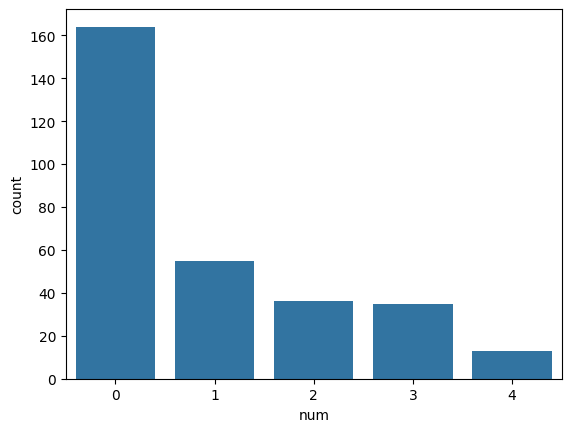

In [8]:
sns.countplot(x='num', data=df)
plt.show()

(4)

In [9]:
df["num"] = df["num"].apply(lambda x: 1 if x > 0 else 0)
df["num"].value_counts()

num
0    164
1    139
Name: count, dtype: int64

In [10]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.948726,1,1,0.757525,-0.264900,1,2,0.017197,0,1.087338,3,0.0,6.0,0
1,1.392002,1,4,1.611220,0.760415,0,2,-1.821905,1,0.397182,2,3.0,3.0,1
2,1.392002,1,4,-0.665300,-0.342283,0,2,-0.902354,1,1.346147,2,2.0,7.0,1
3,-1.932564,1,3,-0.096170,0.063974,0,0,1.637359,0,2.122573,3,0.0,3.0,0
4,-1.489288,0,2,-0.096170,-0.825922,0,2,0.980537,0,0.310912,1,0.0,3.0,0


(5) Interpretation:
1. There is a clear correlation between partial continuous variables (e.g., age, cholesterol, maximum heart rate) and binary target variables, suggesting that these characteristics may be important predictors.
2. Strong correlations between certain features (such as blood pressure and cholesterol) may require feature selection or dimensionality reduction to mitigate collinearity.

Correlation with Heart Disease:
oldpeak     0.424510
age         0.223120
trestbps    0.150825
chol        0.085164
thalach    -0.417167
dtype: float64


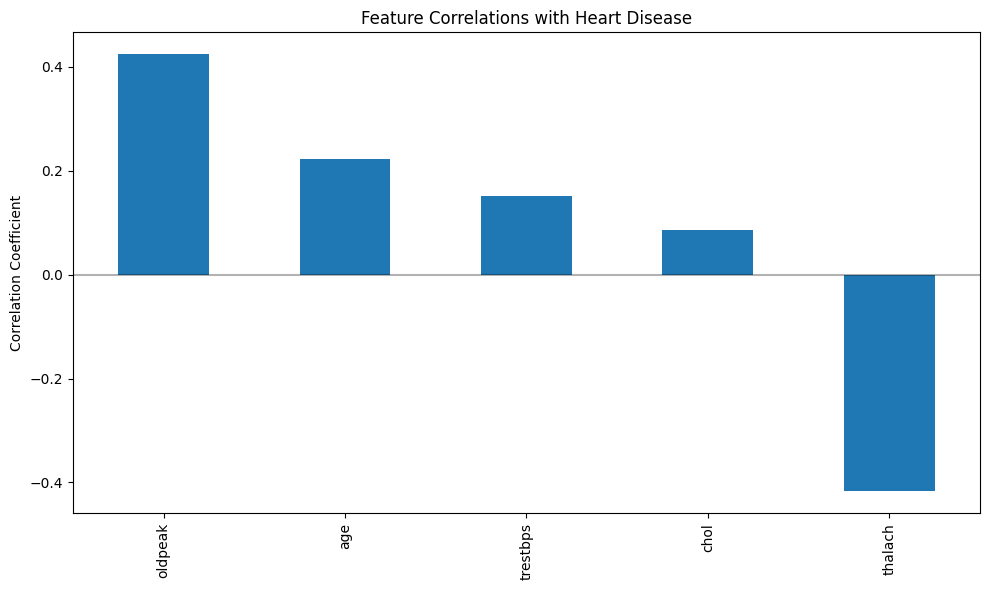

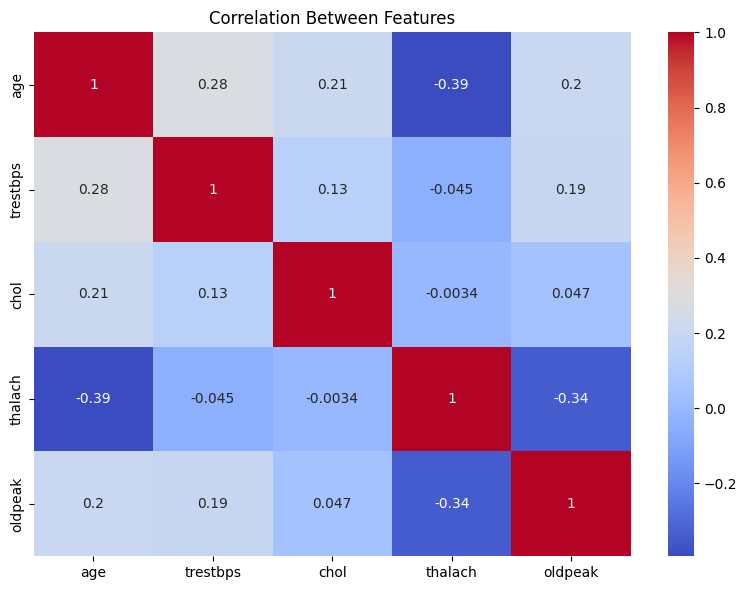

In [11]:
target_correlations = df[num_var].corrwith(df['num']).sort_values(ascending=False)
print("Correlation with Heart Disease:")
print(target_correlations)

plt.figure(figsize=(10, 6))
target_correlations.plot(kind='bar')
plt.title('Feature Correlations with Heart Disease')
plt.ylabel('Correlation Coefficient')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
feature_correlation = df[num_var].corr()
sns.heatmap(feature_correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.tight_layout()
plt.show()

(6) Answer:
The code outputs the number of samples remaining after removing the missing values.

In [12]:
df = df.dropna()

In [13]:
df.shape

(297, 14)

(7)

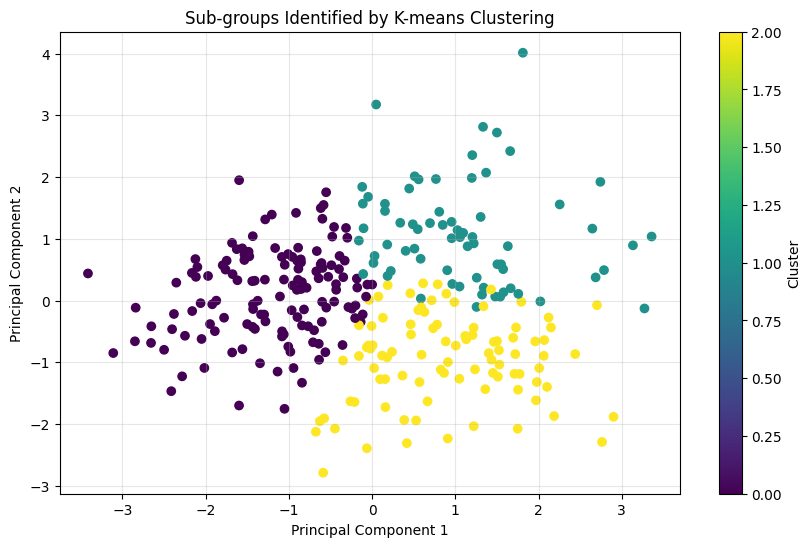

Feature means by cluster:
              age  trestbps      chol   thalach   oldpeak
cluster                                                  
0       -0.685646 -0.382843 -0.203568  0.654234 -0.543476
1        0.760816  1.111375  0.821816  0.012755  0.135872
2        0.467320 -0.268133 -0.273637 -0.960267  0.732056


In [14]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[num_var])

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[num_var])

plt.figure(figsize=(10, 6))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], 
                     c=df['cluster'], cmap='viridis')
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Sub-groups Identified by K-means Clustering')
plt.grid(True, alpha=0.3)
plt.show()

cluster_stats = df.groupby('cluster')[num_var].mean()
print("Feature means by cluster:")
print(cluster_stats)

\newpage

## References

- Jeganathan research lab.

- Janosi, A., Steinbrunn, W., Pfisterer, M., & Detrano, R. (1989). Heart Disease [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.